<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/04.Paper-with-code/cgan/cgan_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CGAN
---

## 데이터 로더

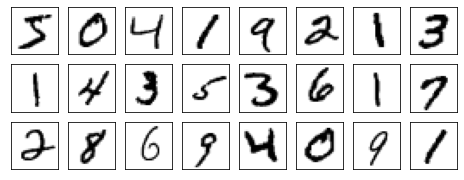

((60000, 28, 28, 1), (60000, 10))

In [1]:
from data_loader import *
from utils import display_sample_img
x_train, y_train, _, _ = mnist_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape

## 모델 구성

In [2]:
IMG_SHAPE = (28,28,1)
NOISE_DIM = 128
LABEL_DIM = 10

In [3]:
from model import BuildModel
builder = BuildModel(IMG_SHAPE, NOISE_DIM, LABEL_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise (InputLayer)             [(None, 128)]        0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['noise[0][0]',                  
                                                                  'condition[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 6272)         871808      ['concatenate[0][0]']    

## 학습

In [4]:
from cgan import CGAN
model = CGAN(gene, disc, IMG_SHAPE, NOISE_DIM, LABEL_DIM )
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999, epsilon=10e-8))
model.cgan.summary()

Model: "CGAN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 Generator (Functional)         (None, 28, 28, 1)    1079041     ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 Discriminator (Functional)     (None, 1)            244865      ['Generator[0][0]',           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


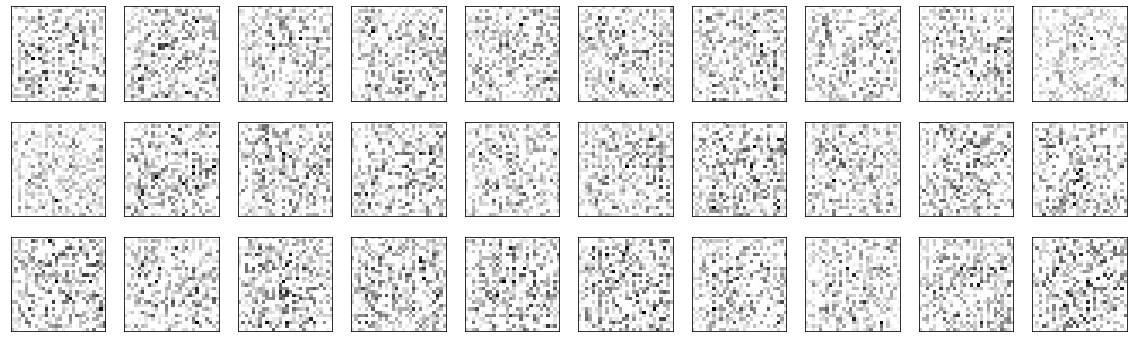

* epoch: 1, d_loss: 1070.973045, g_loss: 2114.696780


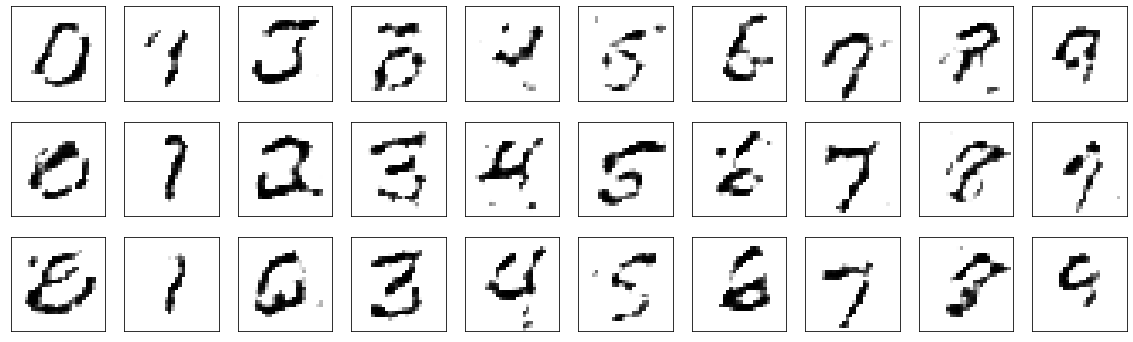

* epoch: 2, d_loss: 1023.185967, g_loss: 2302.121993


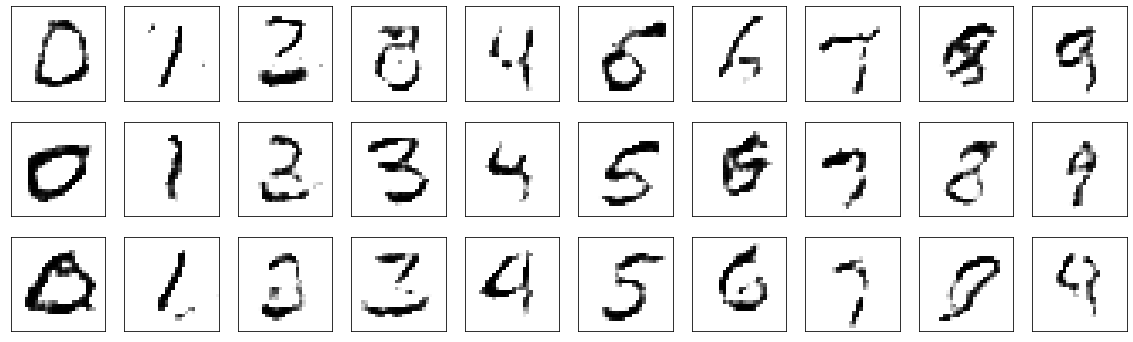

* epoch: 3, d_loss: 1086.086806, g_loss: 2070.065664


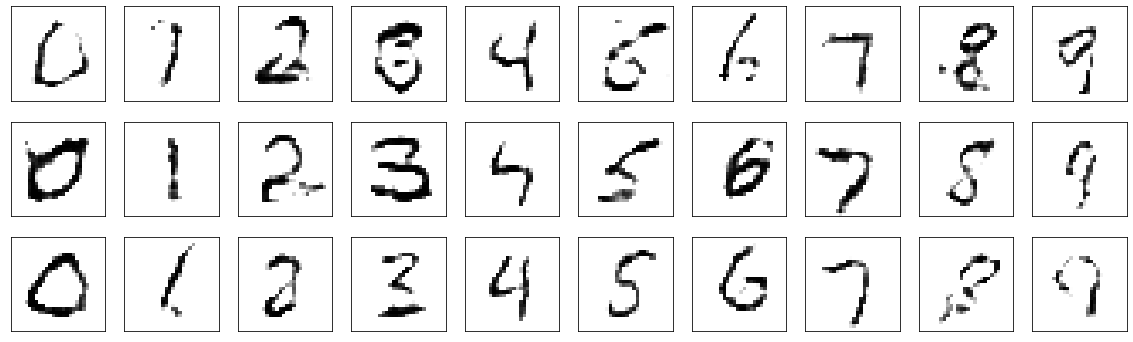

* epoch: 4, d_loss: 1092.754882, g_loss: 2050.483864


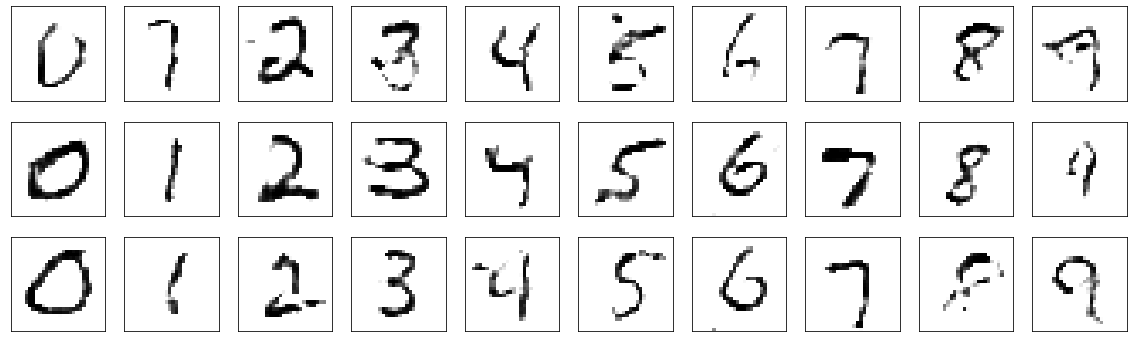

* epoch: 5, d_loss: 1088.210895, g_loss: 2075.515734


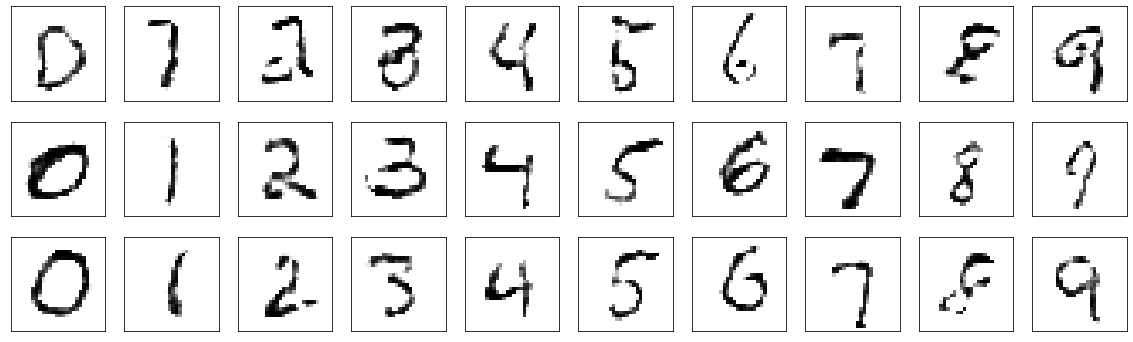

In [5]:
model.fit(x_train, y_train, epochs=5)